First 5 rows of raw data:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  fl

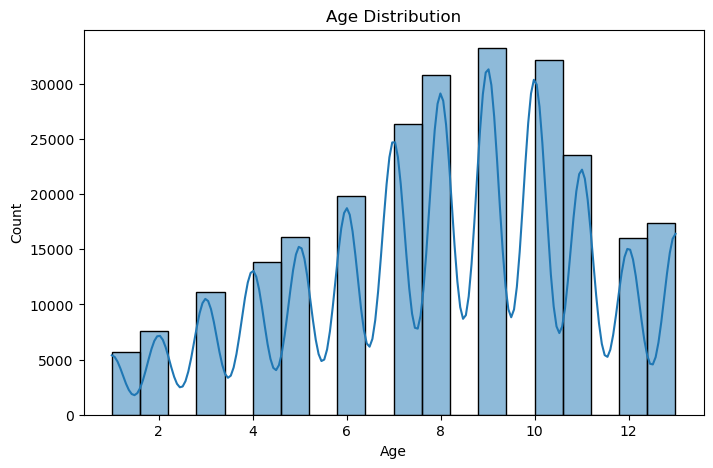

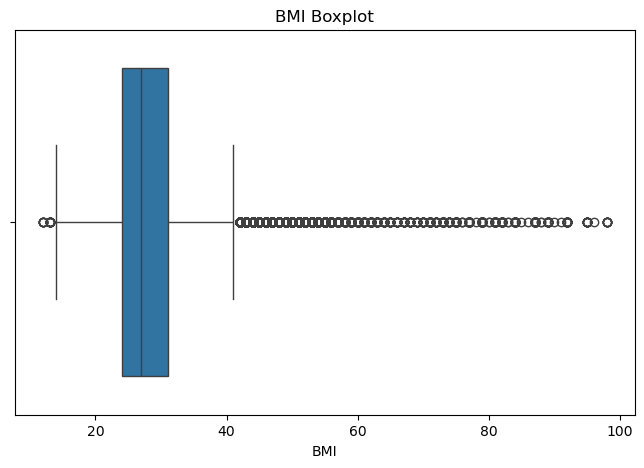

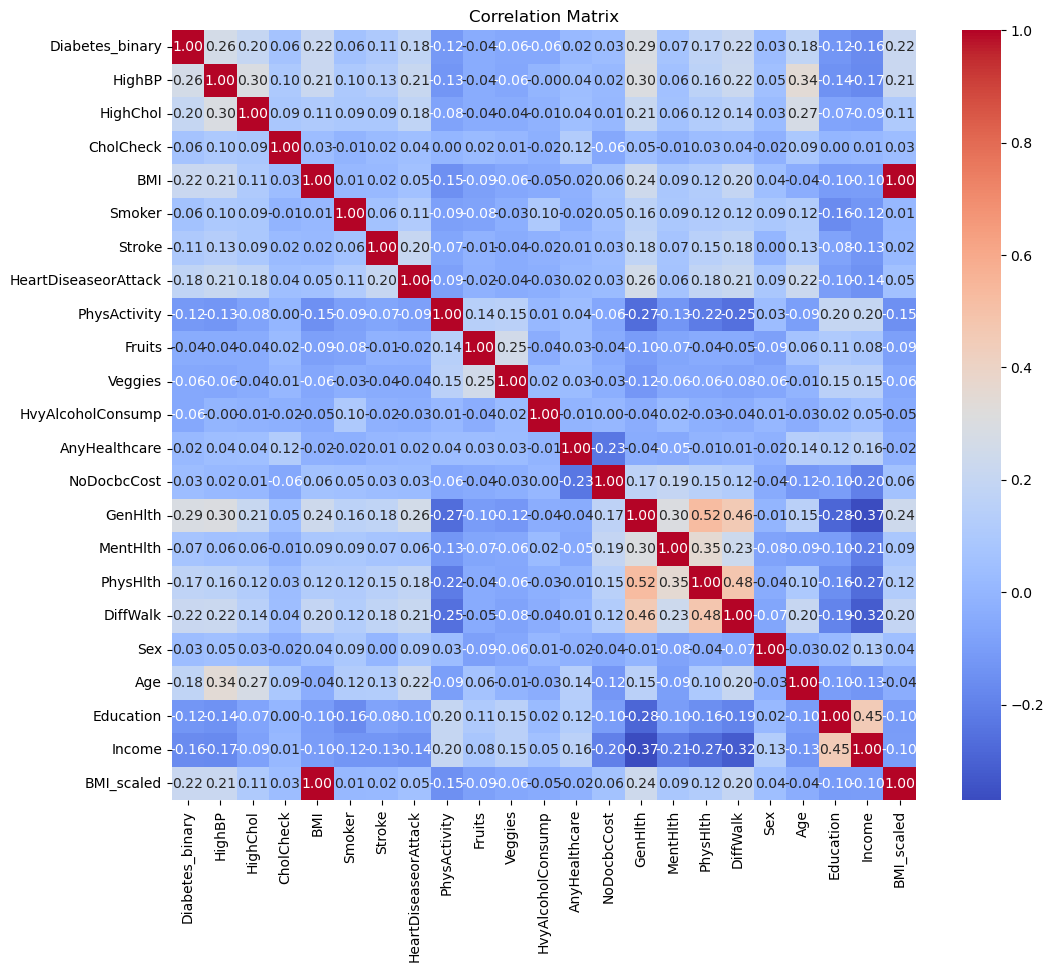

Clean dataset saved to ../data/processed/cdc_diabetes_clean.csv


In [5]:
# 01_data_preparation.ipynb
# AI-Driven Predictive Analytics for Preventive Healthcare
# Sprint 2: Data Preparation

#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 2️⃣ Load Raw Data
csv_path = "../data/raw/diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(csv_path)
print("First 5 rows of raw data:")
display(df.head())

#information about datatypes and collumns 
print("Data info:")
df.info()

#Data Cleaning & Transformation
#Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

#If missing values are present, fill with average value (for simplicity)
df.fillna(df.mean(), inplace=True)

scaler = MinMaxScaler()
if 'BMI' in df.columns:
    df['BMI_scaled'] = scaler.fit_transform(df[['BMI']])

#Exploratory Data Analysis (EDA)
#Histogram for alder (Age)
if 'Age' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['Age'], bins=20, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

#Boxplot for BMI
if 'BMI' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df['BMI'])
    plt.title('BMI Boxplot')
    plt.show()

#Korrelationsmatrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#Save Clean Data
processed_path = "../data/processed/cdc_diabetes_clean.csv"
df.to_csv(processed_path, index=False)
print(f"Clean dataset saved to {processed_path}")
